In [1]:
# exercise 5.1.1

import numpy as np

# Names of data objects
dataobjectNames = [
    'Human',
    'Python',
    'Salmon',
    'Whale',
    'Frog',
    'Komodo dragon',
    'Bat',
    'Pigeon',
    'Cat',
    'Leopard shark',
    'Turtle',
    'Penguin',
    'Porcupine',
    'Eel',
    'Salamander',
    ]

# Attribute names
attributeNames = [
    'Body temperature',
    'Skin cover',
    'Gives birth',
    'Aquatic creature',
    'Aerial creature',
    'Has legs',
    'Hibernates'
    ]

# Attribute values
X = np.asarray(np.mat('''
    1 1 1 0 0 1 0;
    0 2 0 0 0 0 1;
    0 2 0 1 0 0 0;
    1 1 1 1 0 0 0;
    0 0 0 2 0 1 1;
    0 2 0 0 0 1 0;
    1 1 1 0 1 1 1;
    1 3 0 0 1 1 0;
    1 4 1 0 0 1 0;
    0 2 1 1 0 0 0;
    0 2 0 2 0 1 0;
    1 3 0 2 0 1 0;
    1 5 1 0 0 1 1;
    0 2 0 1 0 0 0;
    0 0 0 2 0 1 1 '''))

# Class indices
y = np.asarray(np.mat('3 4 2 3 0 4 3 1 3 2 4 1 3 2 0').T).squeeze()

# Class names
classNames = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile']
    
# Number data objects, attributes, and classes
N, M = X.shape
C = len(classNames)

print('Ran Exercise 5.1.1')

Ran Exercise 5.1.1


In [2]:
# exercise 5.1.2
import numpy as np
from sklearn import tree
from platform import system
from os import getcwd
from toolbox_02450 import windows_graphviz_call
import matplotlib.pyplot as plt
from matplotlib.image import imread


# Fit regression tree classifier, Gini split criterion, no pruning
criterion = 'gini'
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=2)
dtc = dtc.fit(X, y)

fname = 'tree_' + criterion
# Export tree graph .gvz file to parse to graphviz
out = tree.export_graphviz(dtc, out_file=fname + '.gvz', feature_names=attributeNames)

# Depending on the platform, we handle the file differently, first for Linux
# Mac
if system() == 'Linux' or system() == 'Darwin':
    import graphviz

    # Make a graphviz object from the file
    src = graphviz.Source.from_file(fname + '.gvz')
    print('\n\n\n To view the tree, write "src" in the command prompt \n\n\n')

# ... and then for Windows:
if system() == 'Windows':
    # N.B.: you have to update the path_to_graphviz to reflect the position you 
    # unzipped the software in!
    windows_graphviz_call(fname=fname,
                          cur_dir=getcwd(),
                          path_to_graphviz=r'C:\Program Files\Graphviz')
    plt.figure(figsize=(12, 12))
    plt.imshow(imread(fname + '.png'))
    plt.box('off');
    plt.axis('off')
    plt.show()

print('Ran Exercise 5.1.2')




 To view the tree, write "src" in the command prompt 



Ran Exercise 5.1.2


In [25]:
# exercise 5.1.3
import numpy as np
from sklearn import tree
from platform import system
from os import getcwd
from toolbox_02450 import windows_graphviz_call
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Fit regression tree classifier, Gini split criterion, no pruning
criterion='entropy'
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=2)
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=1.0/N)
dtc = dtc.fit(X,y)

fname='tree_' + criterion
# Export tree graph .gvz file to parse to graphviz
out = tree.export_graphviz(dtc, out_file=fname + '.gvz', feature_names=attributeNames)

# Depending on the platform, we handle the file differently, first for Linux 
# Mac
if system() == 'Linux' or system() == 'Darwin':
    import graphviz
    # Make a graphviz object from the file
    src=graphviz.Source.from_file(fname + '.gvz')
    print('\n\n\n To view the tree, write "src" in the command prompt \n\n\n')
    src.render(view=True)

# ... and then for Windows:
if system() == 'Windows':
    # N.B.: you have to update the path_to_graphviz to reflect the position you 
    # unzipped the software in!
    windows_graphviz_call(fname=fname,
                          cur_dir=getcwd(),
                          path_to_graphviz=r'C:\Program Files (x86)\Graphviz2.38')
    plt.figure(figsize=(12,12))
    plt.imshow(imread(fname + '.png'))
    plt.box('off'); plt.axis('off')
    plt.show()

print('Ran Exercise 5.1.3')




 To view the tree, write "src" in the command prompt 



Ran Exercise 5.1.3


In [4]:
# exercise 5.1.4
# requires Tree model from exercise 5.1.2

# Define a new data object (a dragon) with the attributes given in the text
x = np.array([0, 2, 1, 2, 1, 1, 1]).reshape(1,-1)

# Evaluate the classification tree for the new data object
x_class = dtc.predict(x)[0]

# Print results
print('\nNew object attributes:')
print(dict(zip(attributeNames,x[0])))
print('\nClassification result:')
print(classNames[x_class])

print('Ran Exercise 5.1.4')


New object attributes:
{'Body temperature': 0, 'Skin cover': 2, 'Gives birth': 1, 'Aquatic creature': 2, 'Aerial creature': 1, 'Has legs': 1, 'Hibernates': 1}

Classification result:
Reptile
Ran Exercise 5.1.4


In [5]:
# exercise 5.1.5
import numpy as np
from scipy.io import loadmat

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/wine.mat')
X = mat_data['X']
y = mat_data['y'].astype(int).squeeze()
C = mat_data['C'][0,0]
M = mat_data['M'][0,0]
N = mat_data['N'][0,0]

attributeNames = [i[0][0] for i in mat_data['attributeNames']]
classNames = [j[0] for i in mat_data['classNames'] for j in i]


# Remove outliers
outlier_mask = (X[:,1]>20) | (X[:,7]>10) | (X[:,10]>200)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask,:]
y = y[valid_mask]
# Remove attribute 12 (Quality score)
X = X[:,0:11]
attributeNames = attributeNames[0:11]
# Update N and M
N, M = X.shape

print('Ran Exercise 5.1.5')

Ran Exercise 5.1.5


In [6]:
# exercise 5.1.6
import numpy as np
from sklearn import tree
from platform import system
from os import getcwd
from toolbox_02450 import windows_graphviz_call
import matplotlib.pyplot as plt
from matplotlib.image import imread

# requires data from exercise 5.1.5

# Fit regression tree classifier, Gini split criterion, no pruning
criterion='gini'
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=100)
dtc = dtc.fit(X,y)

fname='tree_' + criterion + '_wine_data'
# Export tree graph .gvz file to parse to graphviz
out = tree.export_graphviz(dtc, out_file=fname + '.gvz', feature_names=attributeNames)

# Depending on the platform, we handle the file differently, first for Linux 
# Mac
if system() == 'Linux' or system() == 'Darwin':
    import graphviz
    # Make a graphviz object from the file
    src=graphviz.Source.from_file(fname + '.gvz')
    print('\n\n\n To view the tree, write "src" in the command prompt \n\n\n')
    src.render(view=True)
    
# ... and then for Windows:
if system() == 'Windows':
    # N.B.: you have to update the path_to_graphviz to reflect the position you 
    # unzipped the software in!
    path_to_graphviz = r'C:\Program Files (x86)\Graphviz2.38' # CHANGE THIS
    windows_graphviz_call(fname=fname,
                          cur_dir=getcwd(),
                          path_to_graphviz=path_to_graphviz)
    plt.figure(figsize=(12,12))
    plt.imshow(imread(fname + '.png'))
    plt.box('off'); plt.axis('off')
    plt.show()

print('Ran Exercise 5.1.6')




 To view the tree, write "src" in the command prompt 



Ran Exercise 5.1.6


In [7]:
# exercise 5.1.7
# requires Tree model from exercise 5.1.5
# exercise 5.1.5
import numpy as np
from scipy.io import loadmat

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/wine.mat')
X = mat_data['X']
y = mat_data['y'].astype(int).squeeze()
C = mat_data['C'][0,0]
M = mat_data['M'][0,0]
N = mat_data['N'][0,0]

attributeNames = [i[0][0] for i in mat_data['attributeNames']]
classNames = [j[0] for i in mat_data['classNames'] for j in i]


# Remove outliers
outlier_mask = (X[:,1]>20) | (X[:,7]>10) | (X[:,10]>200)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask,:]
y = y[valid_mask]
# Remove attribute 12 (Quality score)
X = X[:,0:11]
attributeNames = attributeNames[0:11]
# Update N and M
N, M = X.shape

print('Ran Exercise 5.1.5')

# Define a new data object (new type of wine) with the attributes given in the text
x = np.array([6.9, 1.09, .06, 2.1, .0061, 12, 31, .99, 3.5, .44, 12]).reshape(1,-1)

# Evaluate the classification tree for the new data object
x_class = dtc.predict(x)[0]

# Print results
print('\nNew object attributes:')
for i in range(len(attributeNames)):
    print('{0}: {1}'.format(attributeNames[i],x[0][i]))
print('\nClassification result:')
print(classNames[x_class])

print('Ran Exercise 5.1.7')

Ran Exercise 5.1.5

New object attributes:
Fixed acidity: 6.9
Volatile acidity: 1.09
Citric acid: 0.06
Residual sugar: 2.1
Chlorides: 0.0061
Free sulfur dioxide: 12.0
Total sulfur dioxide: 31.0
Density: 0.99
pH: 3.5
Sulphates: 0.44
Alcohol: 12.0

Classification result:
White
Ran Exercise 5.1.7


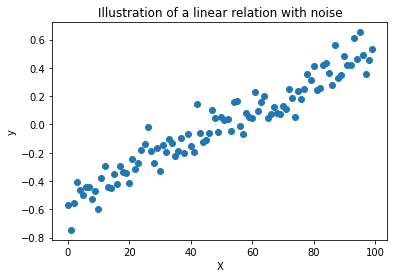

Ran Exercise 5.2.1


In [8]:
# exercise 5.2.1

from matplotlib.pyplot import figure, plot, xlabel, ylabel, title, show
import numpy as np

# Number of data objects
N = 100

# Attribute values
X = np.array(range(N))

# Noise
eps_mean, eps_std = 0, 0.1
eps = np.array(eps_std*np.random.randn(N) + eps_mean)

# Model parameters
w0 = -0.5
w1 = 0.01

# Outputs
y = w0 + w1*X + eps

# Make a scatter plot
figure()
plot(X,y,'o')
xlabel('X'); ylabel('y')
title('Illustration of a linear relation with noise')

show()

print('Ran Exercise 5.2.1')

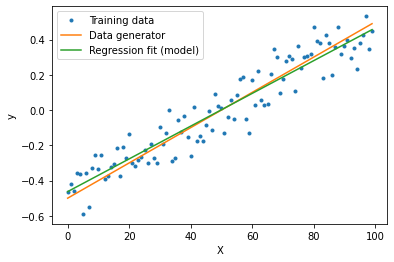

Ran Exercise 5.2.2


In [9]:
# exercise 5.2.2

from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, show
import sklearn.linear_model as lm
import numpy as np

# Use dataset as in the previous exercise
N = 100
X = np.array(range(N)).reshape(-1,1)
eps_mean, eps_std = 0, 0.1
eps = np.array(eps_std*np.random.randn(N) + eps_mean).reshape(-1,1)
w0 = -0.5
w1 = 0.01
y = w0 + w1*X + eps
y_true = y - eps

# Fit ordinary least squares regression model
model = lm.LinearRegression(fit_intercept=True)
model = model.fit(X,y)
# Compute model output:
y_est = model.predict(X)
# Or equivalently:
#y_est = model.intercept_ + X @ model.coef_


# Plot original data and the model output
f = figure()

plot(X,y,'.')
plot(X,y_true,'-')
plot(X,y_est,'-')
xlabel('X'); ylabel('y')
legend(['Training data', 'Data generator', 'Regression fit (model)'])

show()

print('Ran Exercise 5.2.2')

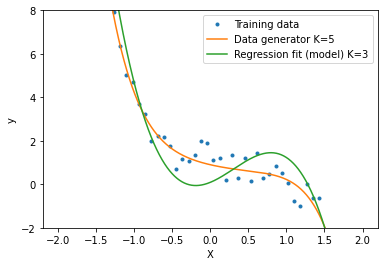

Ran Exercise 5.2.3


In [10]:
# exercise 5.2.3

from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, show, ylim
import numpy as np
import sklearn.linear_model as lm

# Parameters
Kd = 5  # no of terms for data generator
Km = 3  # no of terms for regression model
N = 50  # no of data objects to train a model
Xe =  np.linspace(-2,2,1000).reshape(-1,1) # X values to visualize true data and model
eps_mean, eps_std = 0, 0.5          # noise parameters

# Generate dataset (with noise)
X = np.linspace(-2,2,N).reshape(-1,1)
Xd = np.power(X, range(1,Kd+1))
eps = (eps_std*np.random.randn(N) + eps_mean)
w = -np.power(-.9, range(1,Kd+2))
y = w[0] + Xd @ w[1:] + eps 


# True data generator (assuming no noise)
Xde = np.power(Xe, range(1,Kd+1))
y_true = w[0] + Xde @ w[1:]



# Fit ordinary least squares regression model
Xm = np.power(X, range(1,Km+1))
model = lm.LinearRegression()
model = model.fit(Xm,y)

# Predict values
Xme = np.power(Xe, range(1,Km+1))
y_est = model.predict(Xme)

# Plot original data and the model output
f = figure()
plot(X,y,'.')
plot(Xe,y_true,'-')
plot(Xe,y_est,'-')
xlabel('X'); ylabel('y'); ylim(-2,8)
legend(['Training data', 'Data generator K={0}'.format(Kd), 'Regression fit (model) K={0}'.format(Km)])

show()

print('Ran Exercise 5.2.3')

Ran Exercise 5.1.5


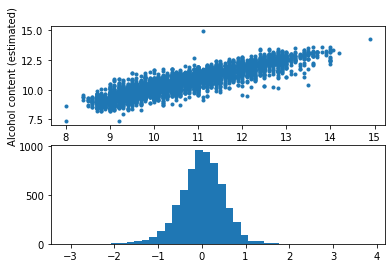

Ran Exercise 5.2.4


In [11]:
# exercise 5.2.4
from matplotlib.pylab import figure, subplot, plot, xlabel, ylabel, hist, show
import sklearn.linear_model as lm

# requires wine data from exercise 5.1.5
# exercise 5.1.5
import numpy as np
from scipy.io import loadmat

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/wine.mat')
X = mat_data['X']
y = mat_data['y'].astype(int).squeeze()
C = mat_data['C'][0,0]
M = mat_data['M'][0,0]
N = mat_data['N'][0,0]

attributeNames = [i[0][0] for i in mat_data['attributeNames']]
classNames = [j[0] for i in mat_data['classNames'] for j in i]


# Remove outliers
outlier_mask = (X[:,1]>20) | (X[:,7]>10) | (X[:,10]>200)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask,:]
y = y[valid_mask]
# Remove attribute 12 (Quality score)
X = X[:,0:11]
attributeNames = attributeNames[0:11]
# Update N and M
N, M = X.shape

print('Ran Exercise 5.1.5')

# Split dataset into features and target vector
alcohol_idx = attributeNames.index('Alcohol')
y = X[:,alcohol_idx]

X_cols = list(range(0,alcohol_idx)) + list(range(alcohol_idx+1,len(attributeNames)))
X = X[:,X_cols]

# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X,y)

# Predict alcohol content
y_est = model.predict(X)
residual = y_est-y

# Display scatter plot
figure()
subplot(2,1,1)
plot(y, y_est, '.')
xlabel('Alcohol content (true)'); ylabel('Alcohol content (estimated)')
subplot(2,1,2)
hist(residual,40)

show()

print('Ran Exercise 5.2.4')

Ran Exercise 5.1.5


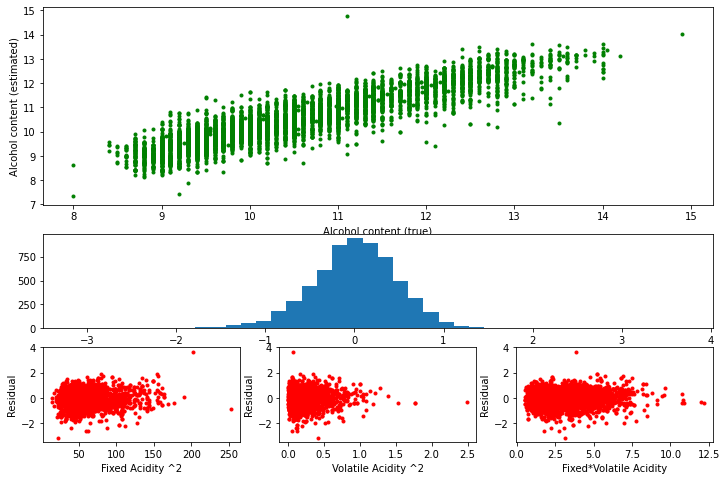

Ran Exercise 5.2.5


In [12]:
# exercise 5.2.5
from matplotlib.pylab import figure, plot, subplot, xlabel, ylabel, hist, show
import sklearn.linear_model as lm

# requires data from exercise 5.1.4
# exercise 5.1.5
import numpy as np
from scipy.io import loadmat

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/wine.mat')
X = mat_data['X']
y = mat_data['y'].astype(int).squeeze()
C = mat_data['C'][0,0]
M = mat_data['M'][0,0]
N = mat_data['N'][0,0]

attributeNames = [i[0][0] for i in mat_data['attributeNames']]
classNames = [j[0] for i in mat_data['classNames'] for j in i]


# Remove outliers
outlier_mask = (X[:,1]>20) | (X[:,7]>10) | (X[:,10]>200)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask,:]
y = y[valid_mask]
# Remove attribute 12 (Quality score)
X = X[:,0:11]
attributeNames = attributeNames[0:11]
# Update N and M
N, M = X.shape

print('Ran Exercise 5.1.5')


# Split dataset into features and target vector
alcohol_idx = attributeNames.index('Alcohol')
y = X[:,alcohol_idx]

X_cols = list(range(0,alcohol_idx)) + list(range(alcohol_idx+1,len(attributeNames)))
X = X[:,X_cols]

# Additional nonlinear attributes
fa_idx = attributeNames.index('Fixed acidity')
va_idx = attributeNames.index('Volatile acidity')
Xfa2 = np.power(X[:,fa_idx],2).reshape(-1,1)
Xva2 = np.power(X[:,va_idx],2).reshape(-1,1)
Xfava = (X[:,fa_idx]*X[:,va_idx]).reshape(-1,1)
X = np.asarray(np.bmat('X, Xfa2, Xva2, Xfava'))

# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X,y)

# Predict alcohol content
y_est = model.predict(X)
residual = y_est-y

# Display plots
figure(figsize=(12,8))

subplot(2,1,1)
plot(y, y_est, '.g')
xlabel('Alcohol content (true)'); ylabel('Alcohol content (estimated)')

subplot(4,1,3)
hist(residual,40)

subplot(4,3,10)
plot(Xfa2, residual, '.r')
xlabel('Fixed Acidity ^2'); ylabel('Residual')

subplot(4,3,11)
plot(Xva2, residual, '.r')
xlabel('Volatile Acidity ^2'); ylabel('Residual')

subplot(4,3,12)
plot(Xfava, residual, '.r')
xlabel('Fixed*Volatile Acidity'); ylabel('Residual')

show()

print('Ran Exercise 5.2.5')

Ran Exercise 5.1.5

Probability of given sample being a white wine: 0.9990

Overall misclassification rate: 0.020


/home/mik/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


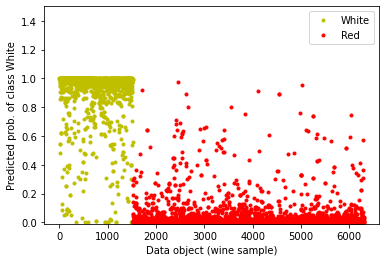

Ran Exercise 5.2.6


In [13]:
# exercise 5.2.6
from matplotlib.pylab import figure, plot, xlabel, ylabel, legend, ylim, show
import sklearn.linear_model as lm

# requires data from exercise 5.1.4
# exercise 5.1.5
import numpy as np
from scipy.io import loadmat

# Load Matlab data file and extract variables of interest
mat_data = loadmat('02450_toolbox/Data/wine.mat')
X = mat_data['X']
y = mat_data['y'].astype(int).squeeze()
C = mat_data['C'][0,0]
M = mat_data['M'][0,0]
N = mat_data['N'][0,0]

attributeNames = [i[0][0] for i in mat_data['attributeNames']]
classNames = [j[0] for i in mat_data['classNames'] for j in i]


# Remove outliers
outlier_mask = (X[:,1]>20) | (X[:,7]>10) | (X[:,10]>200)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask,:]
y = y[valid_mask]
# Remove attribute 12 (Quality score)
X = X[:,0:11]
attributeNames = attributeNames[0:11]
# Update N and M
N, M = X.shape

print('Ran Exercise 5.1.5')

# Fit logistic regression model

model = lm.LogisticRegression()
model = model.fit(X,y)

# Classify wine as White/Red (0/1) and assess probabilities
y_est = model.predict(X)
y_est_white_prob = model.predict_proba(X)[:, 0] 

# Define a new data object (new type of wine), as in exercise 5.1.7
x = np.array([6.9, 1.09, .06, 2.1, .0061, 12, 31, .99, 3.5, .44, 12]).reshape(1,-1)
# Evaluate the probability of x being a white wine (class=0) 
x_class = model.predict_proba(x)[0,0]

# Evaluate classifier's misclassification rate over entire training data
misclass_rate = np.sum(y_est != y) / float(len(y_est))

# Display classification results
print('\nProbability of given sample being a white wine: {0:.4f}'.format(x_class))
print('\nOverall misclassification rate: {0:.3f}'.format(misclass_rate))

f = figure();
class0_ids = np.nonzero(y==0)[0].tolist()
plot(class0_ids, y_est_white_prob[class0_ids], '.y')
class1_ids = np.nonzero(y==1)[0].tolist()
plot(class1_ids, y_est_white_prob[class1_ids], '.r')
xlabel('Data object (wine sample)'); ylabel('Predicted prob. of class White');
legend(['White', 'Red'])
ylim(-0.01,1.5)

show()

print('Ran Exercise 5.2.6')